In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [5]:
anime = pd.read_csv("anime.csv")
anime.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [7]:
anime.tail()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
18490,18491,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,NaN,Web,2.0,Sparkly Key Animation Studio,NaN,"Action, Ancient China, Chinese Animation, Hist...",NaN,2020.0,NaN,Special episodes of Qin Shi Mingyue: Canghai H...,NaN,NaN,Qin Shi Mingyue: Canghai Hengliu,NaN,NaN
18491,18492,Yi Tang Juchang: Sanguo Yanyi,NaN,TV,108.0,NaN,NaN,Chinese Animation,NaN,2010.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,NaN,TV,13.0,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18493,18494,Chengshi Jiyi Wo Men de Jieri,NaN,TV,NaN,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18494,18495,Heisei Inu Monogatari Bow: Genshi Inu Monogata...,NaN,Movie,NaN,Nippon Animation,NaN,"Comedy, Slice of Life, Dogs",NaN,1994.0,NaN,No synopsis yet - check back soon!,NaN,NaN,Heisei Inu Monogatari Bow,NaN,NaN


In [9]:
#noticed the Japanese_name columns has null values assumed that as anime is from Japan, there was no official translation of the title
#filling in null values with the corresponding anime name from 'Name' column
anime_fill_name = anime['Name']

In [11]:
anime['Japanese_name'] = anime['Japanese_name'].fillna(anime_fill_name)

In [13]:
anime.tail()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
18490,18491,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,Web,2.0,Sparkly Key Animation Studio,NaN,"Action, Ancient China, Chinese Animation, Hist...",NaN,2020.0,NaN,Special episodes of Qin Shi Mingyue: Canghai H...,NaN,NaN,Qin Shi Mingyue: Canghai Hengliu,NaN,NaN
18491,18492,Yi Tang Juchang: Sanguo Yanyi,Yi Tang Juchang: Sanguo Yanyi,TV,108.0,NaN,NaN,Chinese Animation,NaN,2010.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,TV,13.0,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18493,18494,Chengshi Jiyi Wo Men de Jieri,Chengshi Jiyi Wo Men de Jieri,TV,NaN,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18494,18495,Heisei Inu Monogatari Bow: Genshi Inu Monogata...,Heisei Inu Monogatari Bow: Genshi Inu Monogata...,Movie,NaN,Nippon Animation,NaN,"Comedy, Slice of Life, Dogs",NaN,1994.0,NaN,No synopsis yet - check back soon!,NaN,NaN,Heisei Inu Monogatari Bow,NaN,NaN


In [15]:
anime.Japanese_name.head()

0                      Kimetsu no Yaiba: Yuukaku-hen
1                            Fruits Basket the Final
2                         The Founder of Diabolism 3
3     Hagane no Renkinjutsushi: Full Metal Alchemist
4               Shingeki no Kyojin Season 3: Part II
Name: Japanese_name, dtype: object

In [17]:
#no duplicates
anime.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18490    False
18491    False
18492    False
18493    False
18494    False
Length: 18495, dtype: bool

In [19]:
#checking for null values
#a lot of the columns do have null values, won't be much insights from them
#will be hard to fill some in as all the anime are unique, will have multiple Tags, there is no generalisation that can be done
#will have to search for anime individually to get the info.
anime.isnull().sum()

Rank                   0
Name                   0
Japanese_name          0
Type                   0
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
End_year           15641
Description            4
Content_Warning    16655
Related_Mange      10868
Related_anime       8432
Voice_actors        3186
staff               5490
dtype: int64

# Types of Anime

In [22]:
anime.Type.unique()

array(['TV   ', 'Web  ', 'Movie', 'OVA  ', 'Music', 'TV Sp', 'DVD S',
       'Other'], dtype=object)

In [24]:
#there are some whitespaces on some of the anime types,
#going to deal with them as they might become problamatic when displaying the name or trying to call for it

In [26]:
warnings.filterwarnings('ignore')

for i in range(len(anime["Type"])) :
    anime["Type"][i] = anime["Type"][i].strip()
    
anime.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [27]:
anime.Type.unique()

array(['TV', 'Web', 'Movie', 'OVA', 'Music', 'TV Sp', 'DVD S', 'Other'],
      dtype=object)

In [28]:
anime.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


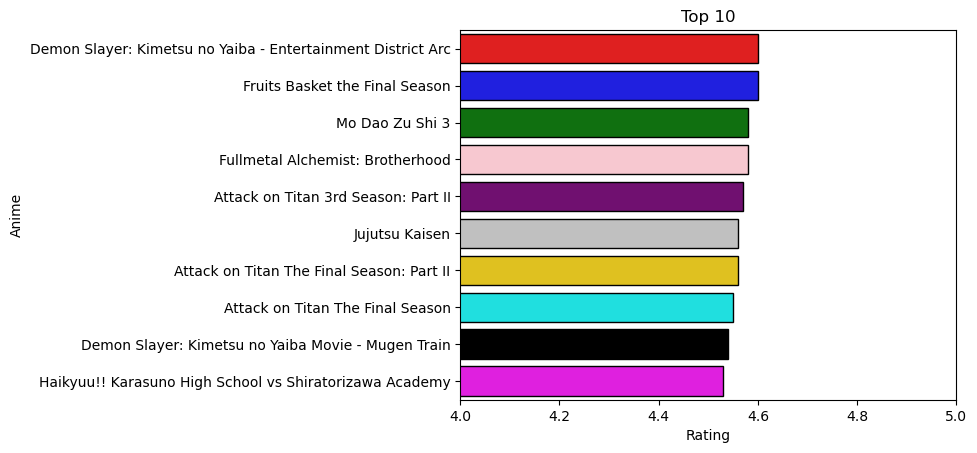

In [32]:
#ignoring the red-box warning that was shown, to allow for a more seamless look
warnings.filterwarnings('ignore')

#getting top 10 from the whole dataset, from the looks of it, it included all types, movies, TV etc.
top_10 = anime.sort_values(by='Rating', ascending = False).head(10)
palette = ['red','blue','green','pink','purple','silver','gold','cyan','black','magenta']
top_10_plot = sns.barplot(data = top_10, y= top_10['Name'], x= top_10['Rating'], palette=palette, edgecolor='black')

plt.title('Top 10')
plt.ylabel('Anime')
plt.xlim(4.0, 5.0)
plt.show()

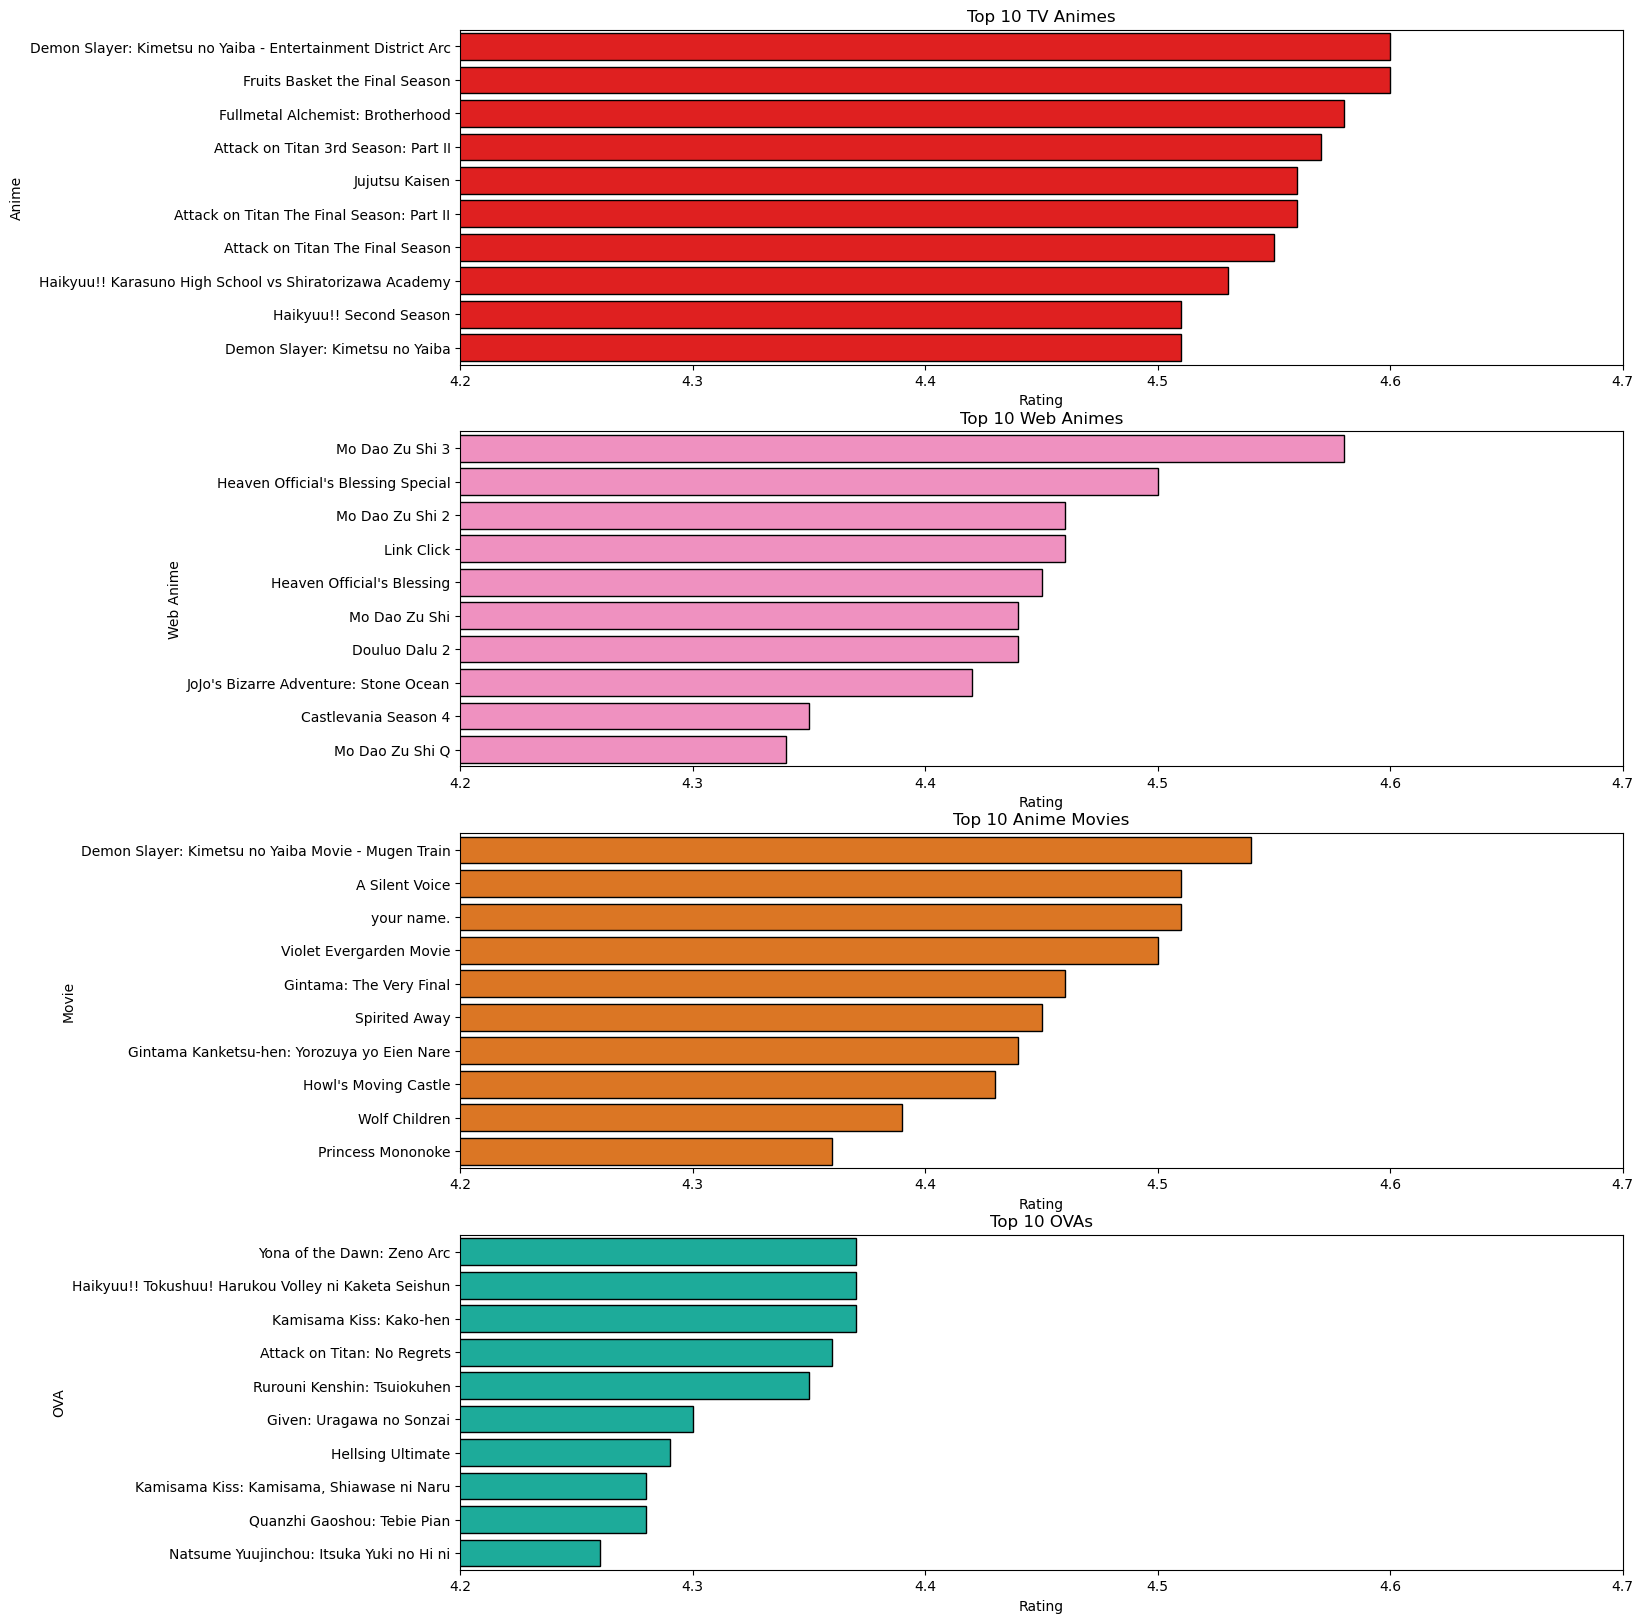

In [34]:
#will try to get top for all different Type
tv_anime = anime[anime["Type"] == "TV"]
top_10_tv_anime = tv_anime.sort_values(by='Rating', ascending = False).head(10)

web_anime = anime[anime["Type"] == "Web"]
top_10_web_anime = web_anime.sort_values(by='Rating', ascending = False).head(10)

movie_anime = anime[anime["Type"] == "Movie"]
top_10_movie_anime = movie_anime.sort_values(by='Rating', ascending = False).head(10)

OVA = anime[anime["Type"] == "OVA"]
top_10_OVA = OVA.sort_values(by='Rating', ascending = False).head(10)

fig, axes = plt.subplots(4, 1, figsize=(15,20))

tv_plot = sns.barplot(ax=axes[0], y= top_10_tv_anime['Name'], x= top_10_tv_anime['Rating'], palette=["#FF0000"], edgecolor='black')
axes[0].set_title("Top 10 TV Animes")

web_plot = sns.barplot(ax=axes[1], y= top_10_web_anime['Name'], x= top_10_web_anime['Rating'], palette=["#FF81C0"], edgecolor='black')
axes[1].set_title("Top 10 Web Animes")

movie_plot = sns.barplot(ax=axes[2], y= top_10_movie_anime['Name'], x= top_10_movie_anime['Rating'], palette=["#F97306"], edgecolor='black')
axes[2].set_title("Top 10 Anime Movies")

ova_plot = sns.barplot(ax=axes[3], y= top_10_OVA['Name'], x= top_10_OVA['Rating'], palette=["#06C2AC"], edgecolor='black')
axes[3].set_title("Top 10 OVAs")

tv_plot.set(xlim=(4.2, 4.7))
web_plot.set(xlim=(4.2, 4.7))
movie_plot.set(xlim=(4.2, 4.7))
ova_plot.set(xlim=(4.2, 4.7))

axes[0].set_ylabel('Anime')
axes[1].set_ylabel('Web Anime')
axes[2].set_ylabel('Movie')
axes[3].set_ylabel('OVA')

plt.show()

# Building Anime Recommender

In [37]:
anime.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


Below, we want to figure out on what basis should the machine learning model base the recommnedation off, luckily the whole dataset does not need to be cleaned as I will be recommending from one column, and that column was Description

The reason for using Description is that a user may want to find an anime that was very similar to what thet watched, did no use Tags as they an anime can come under many tags, description would be easier, a user might want to find an anime based on an alike description.

In [40]:
anime.isnull().sum()

Rank                   0
Name                   0
Japanese_name          0
Type                   0
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
End_year           15641
Description            4
Content_Warning    16655
Related_Mange      10868
Related_anime       8432
Voice_actors        3186
staff               5490
dtype: int64

In [42]:
#will use cosine simialrity to compare if the descriptions are similar for the anime
#will be doing a pairwise similarity score

In [44]:
anime.Description.head()

0    'Tanjiro and his friends accompany the Hashira...
1                    'The final arc of Fruits Basket.'
2                 'The third season of Mo Dao Zu Shi.'
3    "The foundation of alchemy is based on the law...
4    'The battle to retake Wall Maria begins now! W...
Name: Description, dtype: object

In [46]:
anime.shape

(18495, 17)

In [48]:
#as we can see the data type is object, so it needs to be converted into a mumerical feature to allow for machine learning, so each description
#we will use TF-IDF Vectorizer

In [50]:
#import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Remove stop words as they are not important, define a vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

#Replace null values with a blank string or it wont work
anime['Description'] = anime['Description'].fillna('')

#fit the vectorizer
tfidf_matrix = tfidf.fit_transform(anime['Description'])

#output matrix shape
tfidf_matrix.shape

(18495, 34609)

In [56]:
#from sklearn.metrics.pairwise import cosine_similarity

#cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#not gonna bother with this as needs a lot of RAM, my laptop is pretty crap in that reagrds
#will use liner kernal as since we have used TF-IDF
#calculating the dor product will give us the cosine similiarty, will be similar to it as it will tell us how much 2 vectors point in the same direction

In [52]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [58]:
#will make a fucntion that takes in anime titles as input and outputs a list of 10 similar animes
#we will need to reverse map anime titles and DataFrame indicies, we need a mechanism
#that identifies the index of an anime in our dataframe, given its title

In [96]:
#reverse mapping time
indicies = pd.Series(anime.index, index=anime['Name']).drop_duplicates()

In [98]:
#Fucntion that will take in anime title as input and outputs recommendation
def recommendations(name, cosine_sim=cosine_sim):
    #get indicies of the anime that matches the title
    idx = indicies[name]

    #get pairwise sim scores of all animes
    sim_scores = list(enumerate(cosine_sim[idx]))

    #sort the animes based on sim score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Get the 10 most similar scores
    sim_scores = sim_scores[1:11]

    #get the anime indicies
    anime_indicies = [i[0] for i in sim_scores]

    #return the top 10 most similar animes
    return anime['Name'].iloc[anime_indicies]

In [104]:
recommendations("Death Note")

1116       Death Note Rewrite 1: Visions of a God
6507                                Suna no Akari
12342                             Soul Reviver PV
15740                         The God of Death OP
7776                  Momo: The Girl God of Death
14911                            gdgd men's party
18281                 CHARON Pluto’s lonesomeness
15597                           Shadowverse Flame
7534                                To Be Heroine
935      Persona 3 the Movie 4: Winter of Rebirth
Name: Name, dtype: object

Next steps for this project will probably be to see how to deploy it on a website/webapp.
Need to think this through.